# <div style="text-align: center">Exploratory Analysis - Ernon Dataset</div>

**Importing Libraries**

In [1]:
import os, email
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
from nltk.tokenize.regexp import RegexpTokenizer

**Loading Dataset**

In [2]:
emails_df = pd.read_csv(os.getcwd()+'/Downloads/emails.csv')
print(emails_df.shape)
emails_df.head()

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
print(emails_df['message'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


**Helper Functions**

In [4]:
def get_text(msg):
    #To get the content from email
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    #To separate multiple email addresses
    if line:
        address = line.split(',')
        address = frozenset(map(lambda x: x.strip(), address))
    else:
        address = None
    return address

def preprocess_folder(data):
    folders = []
    for item in data:
        if item == None or item == '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()

**Data Cleaning**

In [5]:
# Parsing the emails into a list of email objects
messages = list(map(email.message_from_string, emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)
# Getting fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parsing the content from emails
emails_df['content'] = list(map(get_text, messages))
# Splitting multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of file as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages


In [6]:
emails_df["Folder Name"] = preprocess_folder(emails_df["X-Folder"])   
emails_df.head()

Folder cleaned!


,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Folder Name
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,'sent mail
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,'sent mail
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,'sent mail
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,'sent mail
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,'sent mail


**Number of unique values in each columns**


In [7]:
print('shape of the dataframe:', emails_df.shape)
for col in emails_df.columns:
    print(col, emails_df[col].nunique())

shape of the dataframe: (517401, 19)
file 517401
Message-ID 517401
Date 224128
From 20328
To 54748
Subject 159290
Mime-Version 1
Content-Type 2
Content-Transfer-Encoding 3
X-From 27980
X-To 73552
X-cc 33701
X-bcc 132
X-Folder 5335
X-Origin 259
X-FileName 429
content 249025
user 150
Folder Name 1781


In [8]:
# index setting and dropping columns with too few values
emails_df = emails_df.set_index('Message-ID')\
    .drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parsing datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True)
emails_df.dtypes

Date           object
From           object
To             object
Subject        object
X-From         object
X-To           object
X-cc           object
X-bcc          object
X-Folder       object
X-Origin       object
X-FileName     object
content        object
user           object
Folder Name    object
dtype: object

**Count no. of emails per user, average no. of words in subjects and message content**

In [9]:
# Count words in Subjects and Message Content
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
emails_df['subject_wc'] = emails_df['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails_df['content_wc'] = emails_df['content'].map(lambda x: len(tokenizer.tokenize(x)))
grouped_by_people = emails_df.groupby('user').agg({
        'content': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content': 'No. of emails', 
                                  'subject_wc': 'Avg. subject word count', 
                                  'content_wc': 'Avg, content word count'}, inplace=True)
grouped_by_people.sort_values('No. of emails', ascending=False)

,No. of emails,Avg. subject word count,"Avg, content word count"
user,,,
kaminski-v,28465,4.217530,255.906025
dasovich-j,28234,5.237373,603.393391
kean-s,25351,4.959331,490.837561
mann-k,23381,4.211796,207.195501
jones-t,19950,4.748221,185.462607
...,...,...,...
swerzbin-m,355,4.597183,344.042254
sanchez-m,256,3.957031,258.335938
south-s,248,5.387097,275.040323


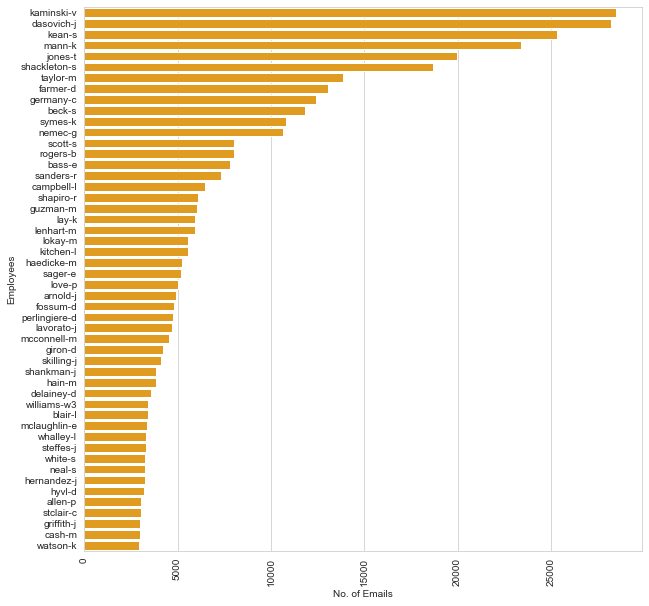

In [10]:
mail_count = emails_df["user"].value_counts()
indices = mail_count.index
count = pd.DataFrame(mail_count)
count.rename(columns = {"user": "Count"}, inplace = True)
count["Employees"] = indices
barplot(df = count[:50], X = "Count", Y = "Employees", figsize = (10, 10), color = 'orange', orient = 'h', ylabel = "Employees", xlabel = "No. of Emails", font_scale = 1.2, rotation = 90)


In [11]:
email_count = emails_df["Folder Name"].value_counts()
count = pd.DataFrame(email_count, columns = ["Folder Name"])
count.rename(columns={'Folder Name': 'Email Count'}, inplace=True)
count

,Email Count
all documents,128103
discussion threads,58609
sent,58168
deleted items,50987
inbox,41507
...,...
conoco,1
business objects,1
west virginia,1
western governor's university,1


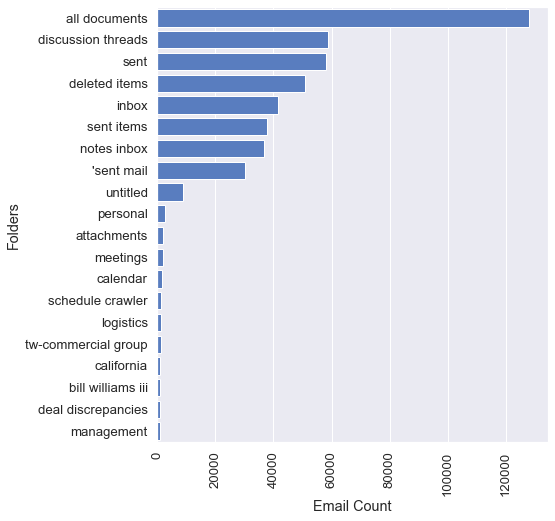

In [12]:
# dataframe containing counts of every word in the emails dataframe
email_count = emails_df["Folder Name"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["Folder Name"])
count["Folder Names"] = indices

    
barplot(df = count[:20], X = "Folder Name", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Email Count", font_scale = 1.2, rotation = 90)


In [13]:
allenp = emails_df[emails_df["user"] == "allen-p"]
allenp["Folder Name"].value_counts()[:8]

all documents         628
'sent mail            602
sent                  562
discussion threads    412
deleted items         361
sent items            345
inbox                  66
notes inbox            48
Name: Folder Name, dtype: int64

In [14]:
emails_df.isnull().sum()

Date               0
From               0
To             21847
Subject            0
X-From            29
X-To              29
X-cc              29
X-bcc             29
X-Folder          29
X-Origin          29
X-FileName        29
content            0
user               0
Folder Name       29
subject_wc         0
content_wc         0
dtype: int64

In [15]:
emails_df.drop('To', axis=1, inplace = True)

In [16]:
emails_df.dropna(inplace = True)
print("Rows with missing values have been removed")
emails_df.isnull().sum()

Rows with missing values have been removed


Date           0
From           0
Subject        0
X-From         0
X-To           0
X-cc           0
X-bcc          0
X-Folder       0
X-Origin       0
X-FileName     0
content        0
user           0
Folder Name    0
subject_wc     0
content_wc     0
dtype: int64

In [17]:
emails_df

,Date,From,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Folder Name,subject_wc,content_wc
Message-ID,,,,,,,,,,,,,,,
<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00-07:00,(phillip.allen@enron.com),,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,'sent mail,0,4
<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00-07:00,(phillip.allen@enron.com),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,'sent mail,1,130
<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00-07:00,(phillip.allen@enron.com),Re: test,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,'sent mail,2,5
<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00-07:00,(phillip.allen@enron.com),,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,'sent mail,0,32
<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00-07:00,(phillip.allen@enron.com),Re: Hello,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,'sent mail,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
<26807948.1075842029936.JavaMail.evans@thyme>,2001-11-28 13:30:11-08:00,(john.zufferli@enron.com),Trade with John Lavorato,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...",,,"\ExMerge - Zufferli, John\Sent Items",ZUFFERLI-J,john zufferli 6-26-02.PST,This is a trade with OIL-SPEC-HEDGE-NG (John L...,zufferli-j,sent items,4,67
<25835861.1075842029959.JavaMail.evans@thyme>,2001-11-28 12:47:48-08:00,(john.zufferli@enron.com),Gas Hedges,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",,,"\ExMerge - Zufferli, John\Sent Items",ZUFFERLI-J,john zufferli 6-26-02.PST,Some of my position is with the Alberta Term b...,zufferli-j,sent items,2,21
<28979867.1075842029988.JavaMail.evans@thyme>,2001-11-28 07:20:00-08:00,(john.zufferli@enron.com),RE: CONFIDENTIAL,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",,,"\ExMerge - Zufferli, John\Sent Items",ZUFFERLI-J,john zufferli 6-26-02.PST,2\n\n -----Original Message-----\nFrom: \tDouc...,zufferli-j,sent items,2,52


In [18]:
table=pd.DataFrame(grouped_by_people.reset_index())

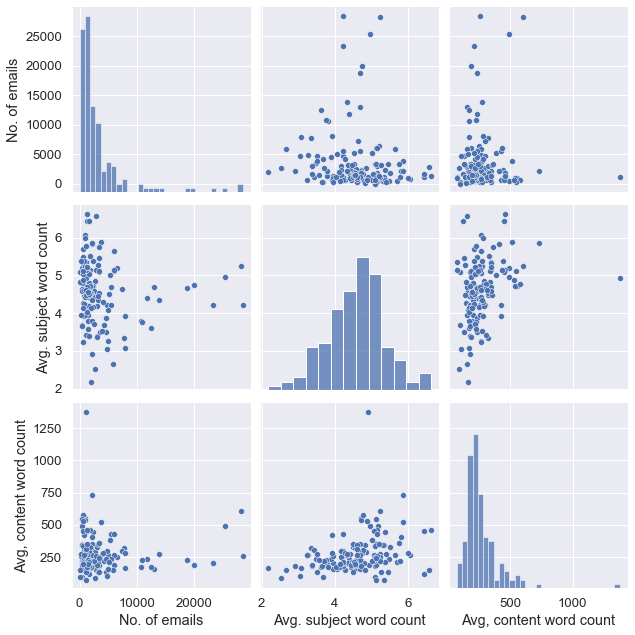

In [19]:
sns.pairplot(table,height=3)